#Dane

## Opis doświadczenia

Przeprowadzane laboratorium polegać będzie na klasyfikacji przy użyciu biblioteki scikit-learn oraz modelu sieci neuronowej typu Feed Forward. Analizowane dane pochodzą z publicznie dostępnego datasetu "Rice (Cammeo and Osmancik)" ([Link do zbioru](https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik)).

Zbiór danych składa sięz pomiarów fizycznych dokonanych na dwóch klasach ziarenek ryżu. Naszym celem jest nauczenie modelu na podstawie dostępnych danych jak rozróźniać klasy ziarenek, tak aby był w stanie prawidłowo rozpoznać nowe instancje.


Zbiór danych składa się z:

* 3810 przykładów
* 2 klas: Cammeo i Osmancik
* 7 atrybutów: powierzchni, obwodu, długości osi większej, długości osi mniejszej, ekscentryczności, powierzchni wypukłej i stopnia wypełnienia
* 1630 przykładów jest klasy Cammeo a 2180 klasy Osmancik

Zbiór importuję za pomocą funkcji fetch_ucirepo z biblioteki `ucimplrepo` z argumentem 'id=545'.

#Importowanie i czyszczenie zbioru danych

Tutaj importujemy wszystkie biblioteki, z których będziemy potrzebować dostępu do funkcji i ładujemy zestaw danych.

In [ ]:
pip install ucimlrepo

In [ ]:
#Import wymaganych bibliotek
import keras #biblioteka z sieciami neuronowymi
import pandas as pd #wczytanie danych jako tabelek
import seaborn as sns #narzędzie do wizualizacji
import matplotlib.pyplot as plt #narzędzie do wizualizacji
import numpy as np # algebra liniowa
from sklearn.preprocessing import normalize #biblioteka uczenia maszynowego
from ucimlrepo import fetch_ucirepo  # importowanie danych

#  Wczytanie zbioru
input = fetch_ucirepo(id=545)
rice_dataset = input.data['original']

rice_dataset.loc[rice_dataset["Class"]=="Osmancik","Class"]=0
rice_dataset.loc[rice_dataset["Class"]=="Cammeo","Class"]=1


print(rice_dataset.describe())

               Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count   3810.000000  3810.000000        3810.000000        3810.000000   
mean   12667.727559   454.239180         188.776222          86.313750   
std     1732.367706    35.597081          17.448679           5.729817   
min     7551.000000   359.100006         145.264465          59.532406   
25%    11370.500000   426.144752         174.353855          82.731695   
50%    12421.500000   448.852493         185.810059          86.434647   
75%    13950.000000   483.683746         203.550438          90.143677   
max    18913.000000   548.445984         239.010498         107.542450   

       Eccentricity   Convex_Area       Extent  
count   3810.000000   3810.000000  3810.000000  
mean       0.886871  12952.496850     0.661934  
std        0.020818   1776.972042     0.077239  
min        0.777233   7723.000000     0.497413  
25%        0.872402  11626.250000     0.598862  
50%        0.889050  12706.500000     0

In [ ]:
print(rice_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB
None


## Wizualizacja danych

Przez zastosowanie różnorodnych narzędzi wizualizacyjnych, takich jak wykresy rozproszenia, histogramy czy heatmapy, możemy zgłębić zależności pomiędzy różnymi atrybutami, a także identyfikować unikalne cechy każdej klasy. Przyczyni się to do lepszego zrozumienia i interpretacji informacji zawartych w zbiorze.

Bazując na heatmapie możemy zauważyć mocną korelację 'Perimeter' i 'Convex_Area' z innymi atrybutami.

<ipython-input-101-48e14c1812ce>:187: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = rice_dataset.corr()


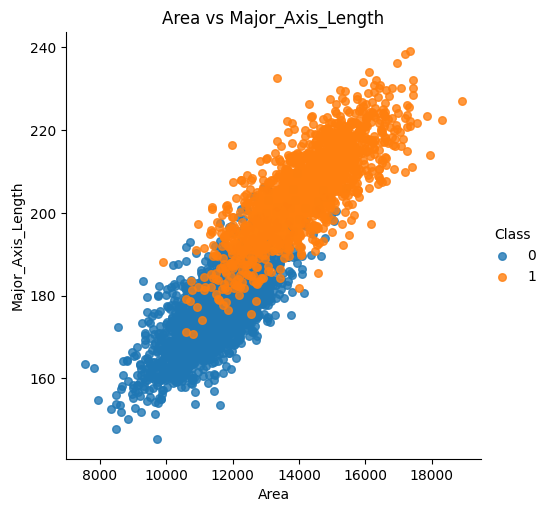

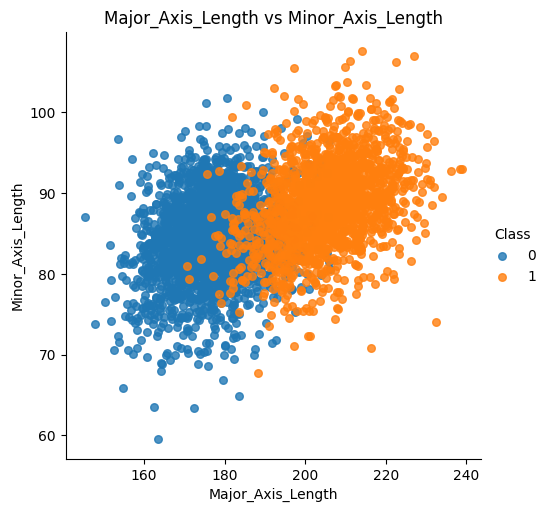

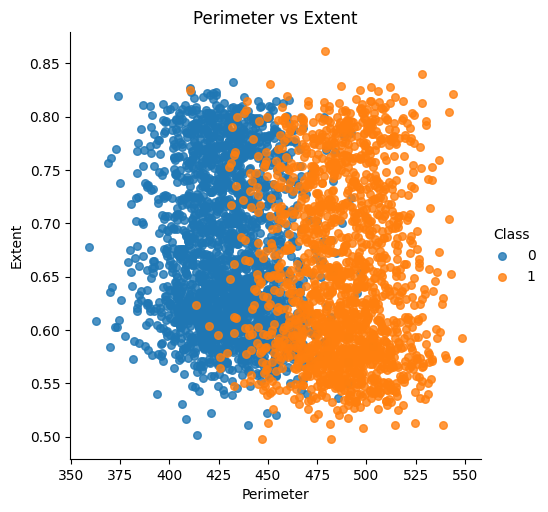

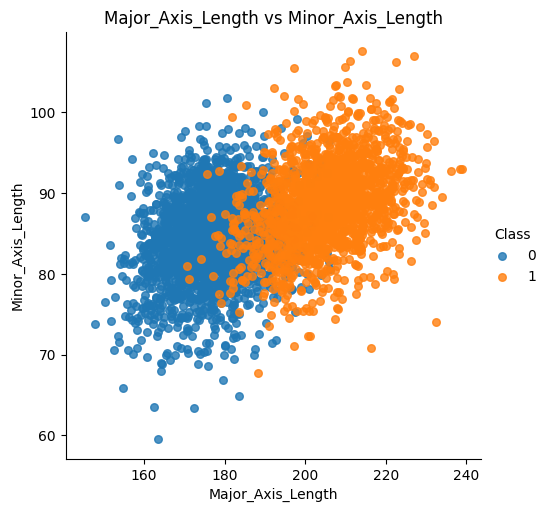

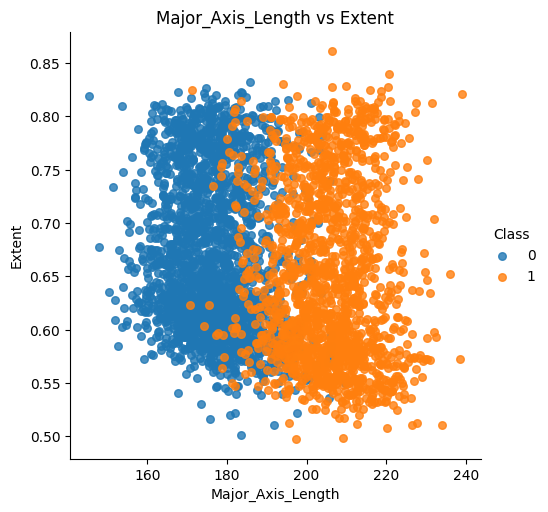

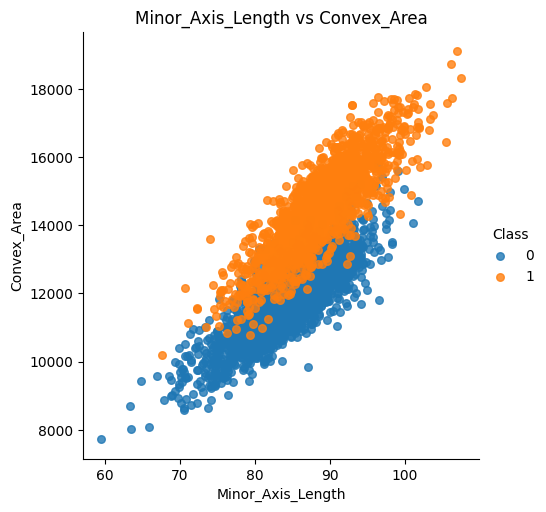

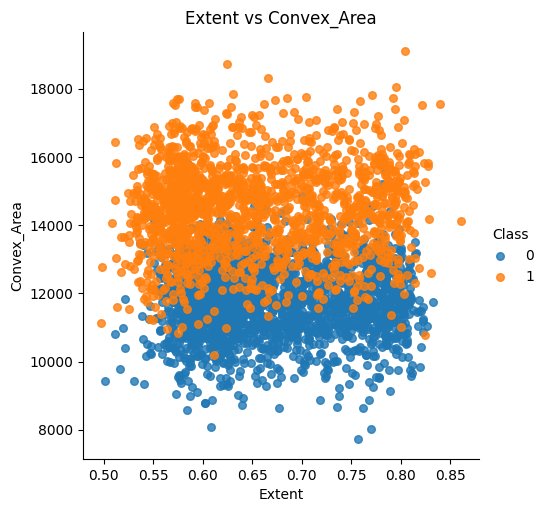

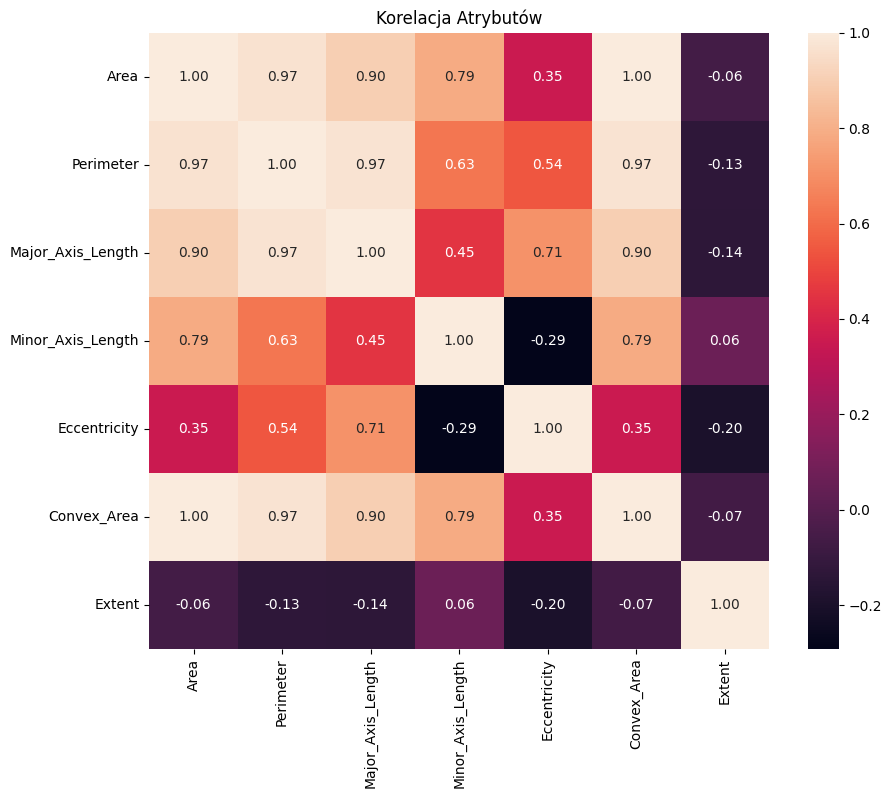

In [ ]:
# sns.lmplot(x= 'Area', y = 'Perimeter',
#            data=rice_dataset,
#            fit_reg=False,
#            hue="Class",
#            scatter_kws={"marker": "D",
#                         "s": 50})
# plt.title('Area vs Perimeter')

sns.lmplot(x= 'Area', y = 'Major_Axis_Length',
           data=rice_dataset,
           fit_reg=False,
           hue="Class",
           scatter_kws={"marker": "D",
                        "s": 30})
plt.title('Area vs Major_Axis_Length')

# sns.lmplot(x= 'Area', y = 'Minor_Axis_Length',
#            data=rice_dataset,
#            fit_reg=False,
#            hue="Class",
#            scatter_kws={"marker": "D",
#                         "s": 50})
# plt.title('Area vs Minor_Axis_Length')

# sns.lmplot(x= 'Area', y = 'Eccentricity',
#            data=rice_dataset,
#            fit_reg=False,
#            hue="Class",
#            scatter_kws={"marker": "D",
#                         "s": 30})
# plt.title('Area vs Eccentricity')

# sns.lmplot(x= 'Area', y = 'Convex_Area',
#            data=rice_dataset,
#            fit_reg=False,
#            hue="Class",
#            scatter_kws={"marker": "D",
#                         "s": 50})
# plt.title('Area vs Convex_Area')

# sns.lmplot(x= 'Area', y = 'Extent',
#            data=rice_dataset,
#            fit_reg=False,
#            hue="Class",
#            scatter_kws={"marker": "D",
#                         "s": 50})
# plt.title('Area vs Extent')

sns.lmplot(x = 'Major_Axis_Length', y = 'Minor_Axis_Length',
           data=rice_dataset,
           fit_reg=False,
           hue="Class",
           scatter_kws={"marker": "D",
                        "s": 30})
plt.title('Major_Axis_Length vs Minor_Axis_Length')

# sns.lmplot(x = 'Perimeter', y = 'Major_Axis_Length',
#            data=rice_dataset,
#            fit_reg=False,
#            hue="Class",
#            scatter_kws={"marker": "D",
#                         "s": 50})
# plt.title('Perimeter vs Major_Axis_Length')

# sns.lmplot(x = 'Perimeter', y = 'Minor_Axis_Length',
#            data=rice_dataset,
#            fit_reg=False,
#            hue="Class",
#            scatter_kws={"marker": "D",
#                         "s": 50})
# plt.title('Perimeter vs Minor_Axis_Length')

# sns.lmplot(x = 'Perimeter', y = 'Eccentricity',
#            data=rice_dataset,
#            fit_reg=False,
#            hue="Class",
#            scatter_kws={"marker": "D",
#                         "s": 50})
# plt.title('Perimeter vs Eccentricity')

# sns.lmplot(x = 'Perimeter', y = 'Convex_Area',
#            data=rice_dataset,
#            fit_reg=False,
#            hue="Class",
#            scatter_kws={"marker": "D",
#                         "s": 50})
# plt.title('Perimeter vs Convex_Area')

sns.lmplot(x = 'Perimeter', y = 'Extent',
           data=rice_dataset,
           fit_reg=False,
           hue="Class",
           scatter_kws={"marker": "D",
                        "s": 30})
plt.title('Perimeter vs Extent')

# sns.lmplot(x = 'Extent', y = 'Eccentricity',
#            data=rice_dataset,
#            fit_reg=False,
#            hue="Class",
#            scatter_kws={"marker": "D",
#                         "s": 50})
# plt.title('Extent vs Eccentricity')

sns.lmplot(x = 'Major_Axis_Length', y = 'Minor_Axis_Length',
           data=rice_dataset,
           fit_reg=False,
           hue="Class",
           scatter_kws={"marker": "D",
                        "s": 30})
plt.title('Major_Axis_Length vs Minor_Axis_Length')

# sns.lmplot(x = 'Major_Axis_Length', y = 'Convex_Area',
#            data=rice_dataset,
#            fit_reg=False,
#            hue="Class",
#            scatter_kws={"marker": "D",
#                         "s": 30})
# plt.title('Major_Axis_Length vs Convex_Area')

# sns.lmplot(x = 'Major_Axis_Length', y = 'Eccentricity',
#            data=rice_dataset,
#            fit_reg=False,
#            hue="Class",
#            scatter_kws={"marker": "D",
#                         "s": 30})
# plt.title('Major_Axis_Length vs Eccentricity')


sns.lmplot(x = 'Major_Axis_Length', y = 'Extent',
           data=rice_dataset,
           fit_reg=False,
           hue="Class",
           scatter_kws={"marker": "D",
                        "s": 30})
plt.title('Major_Axis_Length vs Extent')

sns.lmplot(x = 'Minor_Axis_Length', y = 'Convex_Area',
           data=rice_dataset,
           fit_reg=False,
           hue="Class",
           scatter_kws={"marker": "D",
                        "s": 30})
plt.title('Minor_Axis_Length vs Convex_Area')

# sns.lmplot(x = 'Minor_Axis_Length', y = 'Eccentricity',
#            data=rice_dataset,
#            fit_reg=False,
#            hue="Class",
#            scatter_kws={"marker": "D",
#                         "s": 50})
# plt.title('Minor_Axis_Length vs Eccentricity')

# sns.lmplot(x = 'Minor_Axis_Length', y = 'Extent',
#            data=rice_dataset,
#            fit_reg=False,
#            hue="Class",
#            scatter_kws={"marker": "D",
#                         "s": 50})
# plt.title('Minor_Axis_Length vs Extent')

# sns.lmplot(x = 'Eccentricity', y = 'Convex_Area',
#            data=rice_dataset,
#            fit_reg=False,
#            hue="Class",
#            scatter_kws={"marker": "D",
#                         "s": 30})
# plt.title('Eccentricity vs Convex_Area')

# sns.lmplot(x = 'Extent', y = 'Eccentricity',
#            data=rice_dataset,
#            fit_reg=False,
#            hue="Class",
#            scatter_kws={"marker": "D",
#                         "s": 50})
# plt.title('Extent vs Eccentricity')

sns.lmplot(x = 'Extent', y = 'Convex_Area',
           data=rice_dataset,
           fit_reg=False,
           hue="Class",
           scatter_kws={"marker": "D",
                        "s": 30})
plt.title('Extent vs Convex_Area')


correlation_matrix = rice_dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Korelacja Atrybutów")
plt.show()

## Obróbka danych i wydzielenie zestawów treningowych i testowych

W klasyfikacji ANN, rodzaju nadzorowanego uczenia maszynowego, musimy użyć zestawu treningowego, aby nauczyć nasz model, jak poprawnie klasyfikować przyszłe przykłady. Używamy również zestawu testowego, aby sprawdzić, jak dobry jest nasz model.

Pierwszym krokiem, który wykonamy, jest usunięcie mocno skorelowanych kolumn. Następnie pozbywamy się wierszy z wartościami odstającymi (ang. outliers), które mogłyby negatywnie zniekształcić wzorce wyuczone przez model.

Następnie podzielimy zbiór na dane i etykiety, a je kolejno na zbiór treningowy,testowy i walidacyjny. Do treningu użyjemy 70% instancji, do testów i walidacji po 15%.

Dodatkowo etykiety klas zamieniamy na tzw. 'one-hot vector', czyli wektor złożony z zer i tylko jednej jedynki, której pozycja definiuje jednoznacznie wartość. W naszym przypadku będą dwa rodzaje wektorów [1 0] lub [0 1] i tyle też będzie neuronów w warstwie wyjściowej.


In [ ]:
def remove_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return column[(column >= lower_limit) & (column <= upper_limit)]

# Usunięcie mocno skorelowanych kolumn
rice_dataset = rice_dataset.drop('Perimeter', axis=1).drop('Area', axis=1)

# Usunięcie wierszy posiadających outliers (około 80 rekordów)
rice_dataset = rice_dataset.apply(remove_outliers).dropna()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from keras.utils import to_categorical

# Podział zbioru na dane i etykiety
X = rice_dataset.iloc[:, 0:5].values
y = rice_dataset.iloc[:, 5].values

X=normalize(X,axis=0)

# Podział danych na zbiór treningowy i tymczasowy
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=31)

# Podział danych tymczasowych na zbiór walidujący i testowy
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=31)

# Zmiana etykiet klas na 'one-hot vector'
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
y_train=to_categorical(y_train,num_classes=2)
y_test=to_categorical(y_test,num_classes=2)
y_val=to_categorical(y_val,num_classes=2)

#ANN

## Budowanie sieci początkowej

Struktura sieci obejmuje jedną warstwę wejściową, dwie warstwy ukryte (z funkcją aktywacji ReLU) oraz jedną warstwę wyjściową (z funkcją aktywacji Softmax). Warstwa Dropout została dodana, aby zabezpieczyć model przed overfittingiem.


---


1. Warstwa wejściowa:
*   `model.add(Dense(1000, input_dim=5, activation='relu'))`
*   Dodaje warstwę gęstą (fully connected) z 1000 neuronami (jednostkami).
*   Parametr input_dim=5 określa, że sieć przyjmuje wejścia o rozmiarze 5, co odpowiada liczbie cech w danych.
*   Funkcja aktywacji relu (Rectified Linear Unit) jest używana w warstwie ukrytej, pomagając w uczeniu się nieliniowych zależności.



---


2. Warstwa ukryta:
*   `model.add(Dense(50, activation='relu'))`
*   Dodaje kolejną warstwę gęstą z 50 neuronami.
*   Znowu użyta jest funkcja aktywacji relu.



---


3. Warstwa Dropout (ochrona przed overfittingiem):
*   `model.add(Dropout(0.2))`
*   Dodaje warstwę Dropout, która losowo ustawia 20% neuronów na 0 podczas treningu.
*   Pomaga w redukcji zjawiska przeuczenia (overfitting), chroniąc przed zbytnim dopasowaniem modelu do danych treningowych.


---



4. Warstwa wyjściowa:
*   `model.add(Dense(2, activation='softmax'))`
*   Dodaje warstwę wyjściową z 2 neuronami, co odpowiada dwóm klasom (wieloklasowa klasyfikacja binarna).
*   Funkcja aktywacji softmax jest używana, aby uzyskać prawdopodobieństwa przynależności do poszczególnych klas.


---


Na późniejszym etapie rozpoczniemy eksperymenty polegające na zmianie różnych parametrów.




In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

# Inicjalizacja ANN
model = Sequential()
model.add(Dense(1000,input_dim=5,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

## Uczenie sieci
1. Kompilacja sieci:


`model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])`
*   Użyta funkcja straty (loss): 'categorical_crossentropy'.
*   Algorytm optymalizacji (optimizer): 'adam'.
*   Metryki do monitorowania podczas treningu (metrics): 'accuracy'.


Uzasadnienia:


*   categorical_crossentropy: funkcja ta jest odpowiednia dla problemów klasyfikacji wieloklasowej. Ponieważ mamy do czynienia z tego typu problemem, będzie ona odpowiednia.
*   adam: Algorytm optymalizacji Adam jest popularnym i skutecznym algorytmem do dostosowywania wag w trakcie uczenia. Dobrze radzi sobie w przypadku różnych problemów i jest powszechnie stosowany w praktyce. Dostosowuje on współczynniki nauki parametrów na podstawie średniej drugich momentów gradientów.
*   accuracy: Metryka accuracy jest używana do monitorowania skuteczności klasyfikacji.


---


2. Trening sieci:

`model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=20, epochs=10, verbose=1)`
*   Dane treningowe: X_train, y_train.
*   Dane walidacyjne: X_val, y_val.
*   Rozmiar batcha (batch_size): 20.
*   Liczba epok (epochs): 10.
*   verbose=1: Wyświetla informacje o postępie treningu.

Uzasadnienie:

*   batch_size=20: Określa ilość próbek, na podstawie, których zostanie obliczony gradient. Wybór rozmiaru batcha zależy od wielu czynników, w tym dostępnych zasobów obliczeniowych. Wybrano wartość 20, co jest powszechnie stosowane w praktyce i równoważy wydajność i pamięć.
*   epochs=10: Oznacza ile razy model będzie uczył się na podstawie całego zbioru danych. Określenie liczby epok zależy od specyfiki problemu i danych. W tym przypadku wybrano wartość 10, co może być odpowiednie do wielu prostych problemów. Dla bardziej skomplikowanych problemów, konieczne może być zwiększenie liczby epok.
*   verbose=1: Umożliwia wyświetlanie postępu treningu podczas procesu uczenia. Wartość 1 oznacza wyświetlanie informacji, 0 oznacza brak wyświetlania.



---


Osiągane rezultaty na modelu podstawowym:

*  loss: 0.2340
*  accuracy: 0.9064
*  val_loss: 0.2539
*  val_accuracy: 0.8927



In [ ]:
# Compiling the ANN
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Fitting the ANN to the Training set
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
131/131 [==============================] - 1s 4ms/step - loss: 0.2622 - accuracy: 0.8934 - val_loss: 0.2052 - val_accuracy: 0.9177
Epoch 2/10
131/131 [==============================] - 0s 3ms/step - loss: 0.2568 - accuracy: 0.9007 - val_loss: 0.2207 - val_accuracy: 0.9159
Epoch 3/10
131/131 [==============================] - 0s 3ms/step - loss: 0.2453 - accuracy: 0.8926 - val_loss: 0.2462 - val_accuracy: 0.9070
Epoch 4/10
131/131 [==============================] - 0s 3ms/step - loss: 0.2364 - accuracy: 0.9072 - val_loss: 0.2009 - val_accuracy: 0.9159
Epoch 5/10
131/131 [==============================] - 0s 3ms/step - loss: 0.2429 - accuracy: 0.8995 - val_loss: 0.1959 - val_accuracy: 0.9123
Epoch 6/10
131/131 [==============================] - 0s 3ms/step - loss: 0.2399 - accuracy: 0.9076 - val_loss: 0.1973 - val_accuracy: 0.9088
Epoch 7/10
131/131 [==============================] - 0s 3ms/step - loss: 0.2475 - accuracy: 0.9030 - val_loss: 0.3518 - val_accuracy: 0.8605
Epoch 

## Ocena skuteczności
Za pomocą testowego zbioru możemy sprawdzić z jaką skutecznością nasz model nauczył się klasyfikować ziarenka ryżu. Do oceny wykorzystamy wskaźnik Accuracy, Precision, Recall, F1-Score i Confusion Matrix i krzywą ROC.

### Raport klasyfikacji

Accuracy jest definiowane jako stosunek liczby poprawnie sklasyfikowanych obserwacji do ogólnej liczby obserwacji.

Precision mierzy stosunek liczby poprawnie sklasyfikowanych pozytywnych przypadków do sumy poprawnie sklasyfikowanych pozytywnych przypadków i fałszywie sklasyfikowanych negatywnych przypadków (fałszywych pozytywów).

Accuracy ma wynik 0.91, Precision 0.91. To dobre wyniki ale możliwe do poprawy.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy*100}%")

# Przewidywanie etykiet na danych testowych
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generowanie raportu klasyfikacji
print(classification_report(y_true_classes, y_pred_classes))

18/18 [==============================] - 0s 3ms/step - loss: 0.2219 - accuracy: 0.9088
Accuracy: 90.87656736373901%
18/18 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       322
           1       0.85      0.95      0.90       237

    accuracy                           0.91       559
   macro avg       0.91      0.91      0.91       559
weighted avg       0.91      0.91      0.91       559



### Macierz pomyłek
Macierz pomyłek to tabela, która przedstawia liczbę poprawnych i błędnych klasyfikacji dla każdej z klas na podstawie danych testowych.

<Axes: >

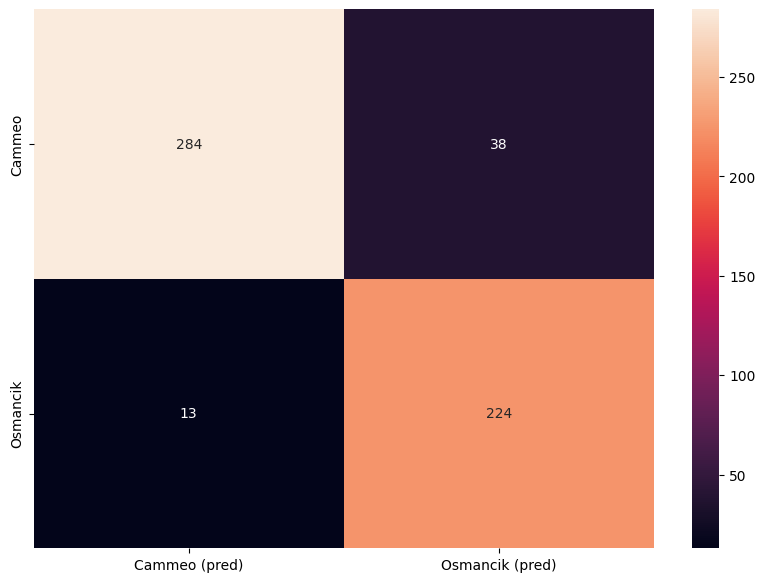

In [ ]:
# Konwertuj one-hot encoding na jednowymiarowe etyki
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Utwórz macierz pomyłek
cm = confusion_matrix(y_true_labels, y_pred_labels)

cm_df = pd.DataFrame(
    cm,
    index = [idx for idx in ['Cammeo', 'Osmancik']],
    columns = [col for col in ['Cammeo (pred)', 'Osmancik (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(cm_df, annot=True, fmt='d')

### Wykres zbieżności
Wykres zbieżności (convergence plot) to graficzne przedstawienie procesu uczenia modelu w trakcie trenowania. Ten rodzaj wykresu pokazuje, jak zmieniają się wartości funkcji straty (loss) w zależności od liczby epok treningu.

Z powodu małej liczby epok nie możemy zauważyć zbieżności wykresów wraz z kolejnymi epokami. Skok 'Validation Loss' jest zaskakującym zjawiskiem, z jakiegoś powodu występującym przy każdym wyuczonym przeze mnie modelu i nie jestem w stanie go wytłumaczyć.

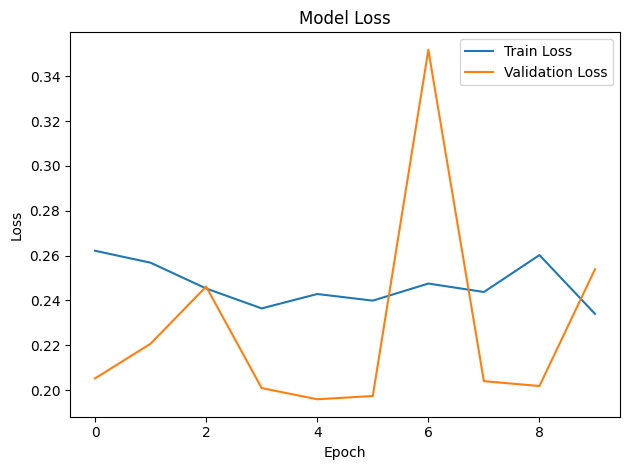

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

### Krzywa ROC
Krzywa ROC jest wizualizacją zależności pomiędzy skutecznością klasyfikacji pozytywnych (Czułość) a nieskutecznością klasyfikacji przypadków negatywnych (1-Swoistość) na każdym poziomie prawdopodobieństwa.

AUROC (Area Under the ROC) to prawdopodobieństwo, że badany model predykcyjny oceni wyżej (wartość score) losowy element klasy pozytywnej od losowego elementu klasy negatywnej.

Należy policzyć dwie krzywe, po jednej na klasę.


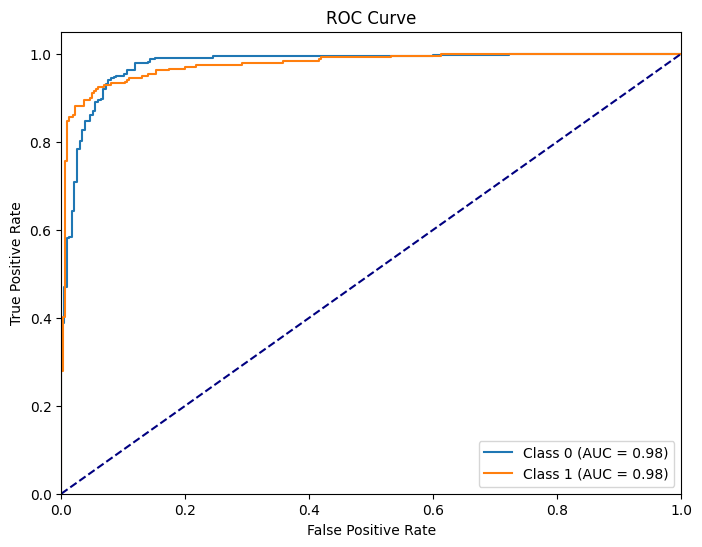

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

n_classes = y_test.shape[1]  # Liczba Klas
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Wykres ROC
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Są to bardzo dobre krzywe ROC o czym świadczy nie tylko ich kształt ale też AUC równe 0.98.

## Wybrane testy

### Inna metoda aktywacji
Zmiana aktywacji warstwy ReLU na LeakyReLU o alpha=0.3 pomogła zwiększyć wynik pod warunkiem, że funkcją aktywacji na pierwszej warstwie jest zwykłe ReLU. Alpha o wartości 0.05 nie poprawiło wyniku. Jednak Leaky ReLU nie jest konsekwentne i często psuje wynik dlatego nie będziemy z niego korzystać. Aktywacja typu sigmoid tutaj nie sprawdza się dobrze.

Accuracy: 91.2343442440033% (ale pojawiało się też 88)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,BatchNormalization, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report

# Initialising the ANN
model = Sequential()

model.add(Dense(1000,input_dim=5,activation='relu'))

model.add(Dense(50))
model.add(LeakyReLU(alpha=0.3))

model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=20,epochs=10,verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy*100}%")

# Przewidywanie etykiet na danych testowych
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

    # Generowanie raportu klasyfikacji
print(classification_report(y_true_classes, y_pred_classes))

Epoch 1/10
131/131 [==============================] - 2s 6ms/step - loss: 0.6867 - accuracy: 0.5666 - val_loss: 0.6844 - val_accuracy: 0.5635
Epoch 2/10
131/131 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.5692 - val_loss: 0.6814 - val_accuracy: 0.5635
Epoch 3/10
131/131 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.5731 - val_loss: 0.6820 - val_accuracy: 0.5635
Epoch 4/10
131/131 [==============================] - 0s 3ms/step - loss: 0.6653 - accuracy: 0.5857 - val_loss: 0.6541 - val_accuracy: 0.5635
Epoch 5/10
131/131 [==============================] - 0s 3ms/step - loss: 0.6166 - accuracy: 0.6720 - val_loss: 0.5586 - val_accuracy: 0.8283
Epoch 6/10
131/131 [==============================] - 0s 3ms/step - loss: 0.5040 - accuracy: 0.7925 - val_loss: 0.5529 - val_accuracy: 0.6386
Epoch 7/10
131/131 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.8516 - val_loss: 0.3074 - val_accuracy: 0.9088
Epoch 

### Dodanie warstw
Accuracy: 91.77101850509644%

Dodanie warstw poprawiło wynik. Przetestowaliśmy dodanie od 1 do 10 warstw i okazało się, że sieć z 3 warstwami ukrytymi jest najlepsza.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,BatchNormalization, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report

# Initialising the ANN
model = Sequential()

model.add(Dense(1000,input_dim=5,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=20,epochs=10,verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy*100}%")

# Przewidywanie etykiet na danych testowych
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

    # Generowanie raportu klasyfikacji
print(classification_report(y_true_classes, y_pred_classes))

Epoch 1/10
131/131 [==============================] - 1s 5ms/step - loss: 0.6859 - accuracy: 0.5692 - val_loss: 0.6847 - val_accuracy: 0.5635
Epoch 2/10
131/131 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5692 - val_loss: 0.6841 - val_accuracy: 0.5635
Epoch 3/10
131/131 [==============================] - 1s 5ms/step - loss: 0.6832 - accuracy: 0.5692 - val_loss: 0.6824 - val_accuracy: 0.5635
Epoch 4/10
131/131 [==============================] - 1s 5ms/step - loss: 0.6789 - accuracy: 0.5696 - val_loss: 0.6701 - val_accuracy: 0.5635
Epoch 5/10
131/131 [==============================] - 1s 5ms/step - loss: 0.6475 - accuracy: 0.6352 - val_loss: 0.5497 - val_accuracy: 0.7299
Epoch 6/10
131/131 [==============================] - 1s 5ms/step - loss: 0.4624 - accuracy: 0.8055 - val_loss: 0.3036 - val_accuracy: 0.9088
Epoch 7/10
131/131 [==============================] - 1s 4ms/step - loss: 0.3590 - accuracy: 0.8446 - val_loss: 0.2843 - val_accuracy: 0.8873
Epoch 

### Zmiana liczby neuronów i dodanie warstw
Accuracy: 93.0232584476471%

Wynik się poprawił. Nie miało takiego znaczenia w której warstwie dam ile neuronów tak długo jak było ich co najmniej 50 w jednej i kilkaset w innej. Neurony w ilości ponad tysiąc nie wpływały na znaczącą poprawę wyniku.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,BatchNormalization, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report

# Initialising the ANN
model = Sequential()

model.add(Dense(50,input_dim=5,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=20,epochs=10,verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy*100}%")

# Przewidywanie etykiet na danych testowych
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generowanie raportu klasyfikacji
print(classification_report(y_true_classes, y_pred_classes))

Epoch 1/10
131/131 [==============================] - 2s 10ms/step - loss: 0.6856 - accuracy: 0.5692 - val_loss: 0.6874 - val_accuracy: 0.5635
Epoch 2/10
131/131 [==============================] - 1s 8ms/step - loss: 0.6806 - accuracy: 0.5692 - val_loss: 0.6739 - val_accuracy: 0.5635
Epoch 3/10
131/131 [==============================] - 1s 9ms/step - loss: 0.6355 - accuracy: 0.6348 - val_loss: 0.4949 - val_accuracy: 0.9052
Epoch 4/10
131/131 [==============================] - 1s 5ms/step - loss: 0.4088 - accuracy: 0.8189 - val_loss: 0.2670 - val_accuracy: 0.9070
Epoch 5/10
131/131 [==============================] - 1s 5ms/step - loss: 0.2842 - accuracy: 0.8834 - val_loss: 0.2423 - val_accuracy: 0.9088
Epoch 6/10
131/131 [==============================] - 1s 5ms/step - loss: 0.2980 - accuracy: 0.8780 - val_loss: 0.2213 - val_accuracy: 0.9249
Epoch 7/10
131/131 [==============================] - 1s 5ms/step - loss: 0.2767 - accuracy: 0.8880 - val_loss: 0.2068 - val_accuracy: 0.9213
Epoch

### Zmiana Batch Size i liczby Epok
Accuracy: 92.30769276618958%

Duży batch size (200-300) pogarszał wyniki, za mało przez niego było kroków gradientowych. Mały (5) wydłużał naukę zwłaszcza w połączeniu z duża ilością epok (50-100), które nie przynosiły proporcjonalnych zysków. Najlepiej wyważonymi wartościami według nas są: batch_size=20, epochs=30.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

# Inicjalizacja ANN
model = Sequential()
model.add(Dense(1000,input_dim=5,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=20,epochs=30,verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy*100}%")

# Przewidywanie etykiet na danych testowych
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generowanie raportu klasyfikacji
print(classification_report(y_true_classes, y_pred_classes))

Epoch 1/30
131/131 [==============================] - 1s 4ms/step - loss: 0.6866 - accuracy: 0.5658 - val_loss: 0.6856 - val_accuracy: 0.5635
Epoch 2/30
131/131 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5692 - val_loss: 0.6841 - val_accuracy: 0.5635
Epoch 3/30
131/131 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5692 - val_loss: 0.6830 - val_accuracy: 0.5635
Epoch 4/30
131/131 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.5692 - val_loss: 0.6811 - val_accuracy: 0.5635
Epoch 5/30
131/131 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.5692 - val_loss: 0.6778 - val_accuracy: 0.5635
Epoch 6/30
131/131 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.5692 - val_loss: 0.6641 - val_accuracy: 0.5635
Epoch 7/30
131/131 [==============================] - 0s 3ms/step - loss: 0.6459 - accuracy: 0.6203 - val_loss: 0.6599 - val_accuracy: 0.5635
Epoch 

## Finalne dostosowanie parametrów
*   Funkcja aktywacji - Spośród RELU, Sigmoid, LeakyReLU (alpha=0.3 i 0.05), zwykłe ReLU okazało się być najlepsze.

*   Batch Size - Bardzo duży batch-size (200 - 300) pogarszał wyniki z powodu za małej liczby kroków gradientowych.

*   Liczba epok - 30 epok jest bardzo dobrą liczbą. Przy większej ilości (100) wyniki oscylowały w podobnych wartościach co oznaczało osiągnięcie zbieżności i nie rokowało postępów.

*   Liczba neuronów i warstw - 3 warstwy działają tak dobrze jak i 6 tylko szybciej. Sieć dobrze działa kiedy jedna z warstw ma kilkadziesiąt neuronów a inna kilkaset. Liczba neuronów ponad tysiąc nie przynosi efektów. Ze względu na nieznajomość wag między neuronami trudno powiedzieć czemu akurat taka konfiguracja działa najlepiej.

*   Dropout - większy niż 0.2 powodował utratę zbyt dużej ilości informacji i pogarszał wyniki. Mniejszy nie poprawiał wyników na zbiorze testowym ale co ciekawe też nie powodował overfittingu. Mimo wszystko dla trochę lepszyhc wyników go zostawiłem.

*   Optimizer - sprawdzaliśmy SGD i Adagrad z różnymi 'learning-rate' jednak znacznie odstawały od skuteczności 'adam'.

### Uczenie

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,BatchNormalization

model = Sequential()

model.add(Dense(50,input_dim=5,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=20,epochs=30,verbose=1)

Epoch 1/30
131/131 [==============================] - 3s 6ms/step - loss: 0.6853 - accuracy: 0.5669 - val_loss: 0.6816 - val_accuracy: 0.5635
Epoch 2/30
131/131 [==============================] - 1s 5ms/step - loss: 0.6707 - accuracy: 0.5765 - val_loss: 0.6656 - val_accuracy: 0.5921
Epoch 3/30
131/131 [==============================] - 1s 5ms/step - loss: 0.5270 - accuracy: 0.7518 - val_loss: 0.3415 - val_accuracy: 0.8784
Epoch 4/30
131/131 [==============================] - 1s 5ms/step - loss: 0.3462 - accuracy: 0.8519 - val_loss: 0.2599 - val_accuracy: 0.9034
Epoch 5/30
131/131 [==============================] - 1s 5ms/step - loss: 0.3225 - accuracy: 0.8638 - val_loss: 0.2409 - val_accuracy: 0.9141
Epoch 6/30
131/131 [==============================] - 1s 5ms/step - loss: 0.2979 - accuracy: 0.8734 - val_loss: 0.2188 - val_accuracy: 0.9052
Epoch 7/30
131/131 [==============================] - 1s 5ms/step - loss: 0.2902 - accuracy: 0.8865 - val_loss: 0.2150 - val_accuracy: 0.9034
Epoch 

### Wyniki

####Raport klasyfikacji



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy*100}%")

# Przewidywanie etykiet na danych testowych
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

    # Generowanie raportu klasyfikacji
print(classification_report(y_true_classes, y_pred_classes))

18/18 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.9338
Accuracy: 93.38103532791138%
18/18 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       322
           1       0.95      0.89      0.92       237

    accuracy                           0.93       559
   macro avg       0.94      0.93      0.93       559
weighted avg       0.93      0.93      0.93       559



#### Macierz pomyłek

<Axes: >

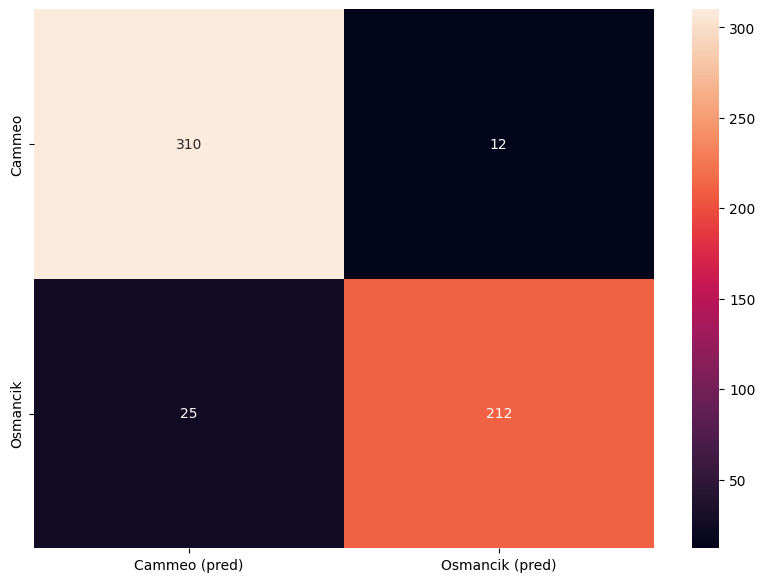

In [ ]:
    # Konwertuj one-hot encoding na jednowymiarowe etyki
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

    # Utwórz macierz pomyłek
cm = confusion_matrix(y_true_labels, y_pred_labels)

cm_df = pd.DataFrame(
    cm,
    index = [idx for idx in ['Cammeo', 'Osmancik']],
    columns = [col for col in ['Cammeo (pred)', 'Osmancik (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(cm_df, annot=True, fmt='d')

#### Wykres zbieżności
Wraz z liczbą epok możemy zauważyć malejącą stratę w przypadku obu zestawów. Jest to pożądane zachowanie. Wykresy nie zbiegają się w stabilny sposób. Skoku 'Validation Loss' niestety nie jestem w stanie wytłumaczyć.

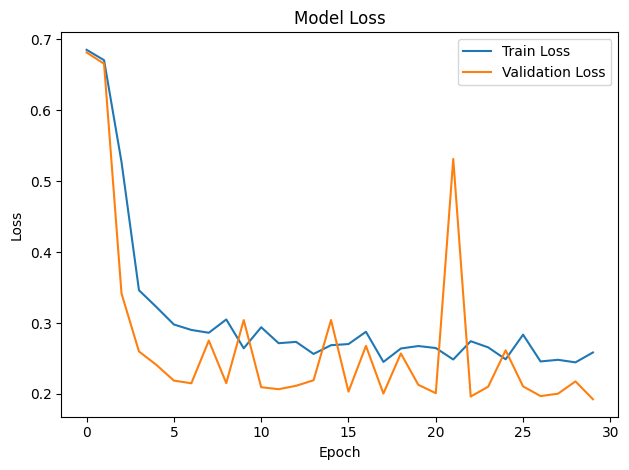

In [ ]:
# Wykres zbieżności
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

####Krzywa ROC
Obie krzywe ROC wygięte są bardzo mocno w kierunku górnego lewego roku wykresu co świadczy o dobrym wyniku, który faktycznie wynosi aż 0.98 dla obu krzywych! To bardzo dobry wynik. Accuracy i Precision na poziomie 0.93 to również bardzo dobry wynik, udało się odrobinę poprawić wyniki z początkowego modelu.

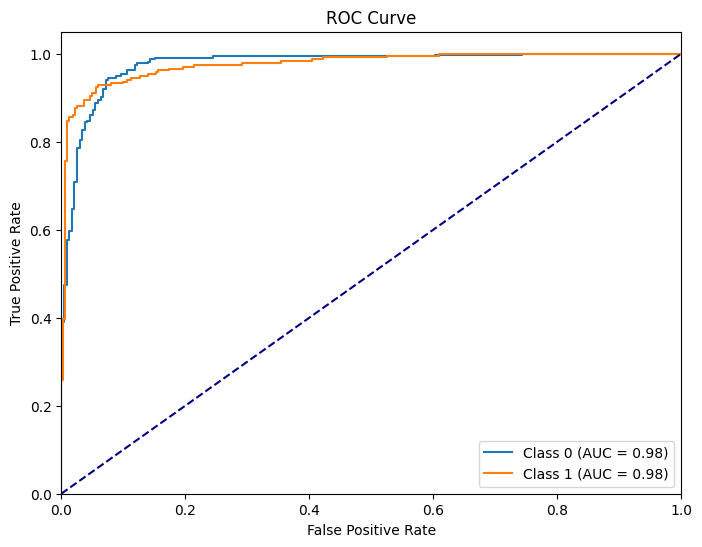

In [ ]:
n_classes = y_test.shape[1]  # Liczba Klas
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Wykres ROC
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()